misc 2023/01/30~

----
- __used in a paper, KB-equation__
----

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a=[[1,0.1,0.1],[0.1,1,0.1],[0.1,0.1,1]]

In [4]:
np.linalg.eig(a)

(array([0.9, 1.2, 0.9]),
 array([[-0.81649658,  0.57735027, -0.05137542],
        [ 0.40824829,  0.57735027, -0.68001791],
        [ 0.40824829,  0.57735027,  0.73139333]]))

In [5]:
v=np.sort(np.random.rand(100))

In [260]:
A=[v for i in range(100)]
B=np.eye(100)
for i in range(100): B[i,:]=v[i]
K=np.exp(-1*np.abs(A-B))
a,b=np.linalg.eig(K)
#plt.imshow(b)

plt.rcParams["font.size"] = 18
#plt.subplot(2,2,1)
plt.plot(a,label='eigen value')
#plt.plot(np.sum(b,axis=0),label='sum')
#plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig('eigs.eps')
plt.close()
#plt.show()
#plt.subplot(2,2,2)
for i in range(0,5):
    plt.plot(b[:,i],label=i)
#plt.legend()
plt.savefig('eigv1.eps')
plt.close()
#plt.show()
#plt.subplot(2,2,3)
for i in range(45,50):
    plt.plot(b[:,i],label=i)
#plt.legend()
plt.savefig('eigv2.eps')
plt.close()
#plt.show()
#plt.subplot(2,2,4)
for i in range(95,100):
    plt.plot(b[:,i],label=i)
#plt.legend()
plt.savefig('eigv3.eps')
plt.close()
#plt.show()

__memo__ 20230131:  
1. error, $x^*-x$, distribution, $e(x)$
2. frequency domain, $e(k)$
3. spectrum density -> reduced from lower freq.

NUFFT: https://jyhmiinlin.github.io/pynufft/index.html

In [8]:
np.random.random(10)

array([0.49158707, 0.33620969, 0.94021384, 0.2168708 , 0.50852112,
       0.11848508, 0.33701872, 0.45260871, 0.21756661, 0.74028588])

In [13]:
49//2

24

In [184]:
def nufftfreqs(M, df=1):
    """Compute the frequency range used in nufft for M frequency bins"""
    return df * np.arange(-(M // 2), M-(M // 2))
    #return df*np.array(np.arange(0,1+M//2).tolist()+np.arange(-M//2,0).tolist())


def nudft(x, y, M, df=1.0, iflag=-1):
    """Non-Uniform Direct Fourier Transform"""
    sign = -1 if iflag < 0 else 1
    return np.dot(y, np.exp(sign * 1j * 2* np.pi*nufftfreqs(M, df) * x[:, np.newaxis]))

In [208]:
x=np.random.rand(1000)
#x=np.linspace(0,1,1000)
y=np.sin(10*x)
y2=np.sin(np.linspace(0,10,1000))
F=nudft(x,y,1000)
#np.fft.fftshift(np.fft.fftshift(np.arange(-10,10)))

In [209]:
a=np.fft.ifft(np.fft.fftshift(F))
A=np.fft.fft(y2)
A2=np.fft.ifft(A)

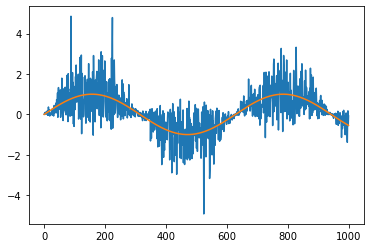

In [210]:
plt.plot(a.real)
plt.plot(A2.real)

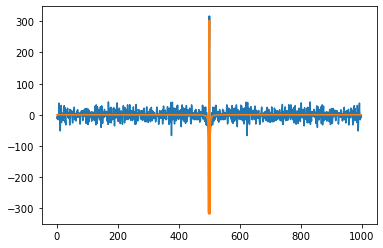

In [211]:
#plt.plot(100*x,y,'.')
plt.plot(F.real)
plt.plot(np.fft.fftshift(A.real))

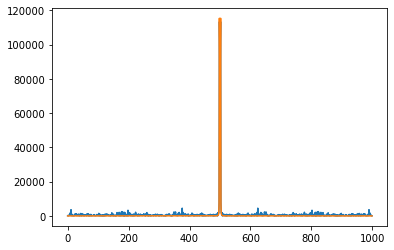

In [215]:
plt.plot(np.absolute(F)**2)
plt.plot(np.absolute(np.fft.fftshift(A))**2)

In [144]:
M=13
np.arange(-(M // 2), 1+(M // 2))
#np.arange(0,1+M//2).tolist()+np.arange(-M//2,0).tolist()

array([-6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6])

----
FLOPs vs time (2023/03/10)

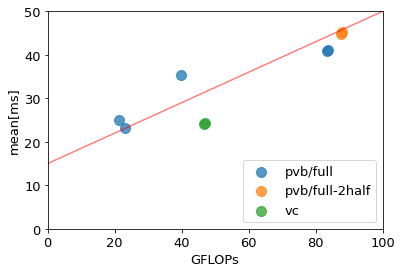

In [244]:
flops=[83.38,39.71,21.17,23.02,83.61]
times=[40.77,35.45,25.10,23.20,41.17]
flops_h,flops_VC=[87.6,87.84],[47.12,46.78]
times_h,times_VC=[44.72,45.25],[24.34,24.17]
plt.scatter(flops,times,s=100,label='pvb/full',alpha=0.75)
plt.scatter(flops_h,times_h,s=100,label='pvb/full-2half',alpha=0.75)
plt.scatter(flops_VC,times_VC,s=100,label='vc',alpha=0.75)
plt.plot([0,100],[15,50],c='r',alpha=0.5)
plt.legend()
plt.xlim(0,100)
plt.ylim(0,50)
plt.xlabel('GFLOPs')
plt.ylabel('mean[ms]')
plt.rcParams["font.size"] = 13